In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

df = pd.read_csv("AAPL.csv")

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [4]:
close = df['Close'].values.reshape(-1, 1)

In [5]:
stock_prices=pd.DataFrame(df["Close"])

In [6]:
window_size = 60  
def dataset(data, window_size):
    input_data, output_data = [], []
    for i in range(len(data) - window_size):
        input_data.append(data[i:i + window_size])
        output_data.append(data[i + window_size])
    return np.array(input_data), np.array(output_data)

In [7]:
scaler = MinMaxScaler()
close_scaled = scaler.fit_transform(close)

In [8]:
X_data, Y_data =dataset(close_scaled, window_size)

In [9]:
train_split = int(len(X_data) * 0.98)
validate_split = int(len(X_data) * 0.99)
X_train_set, X_test_set = X_data[:train_split], X_data[train_split:validate_split]
Y_train_set, Y_test_set = Y_data[:train_split], Y_data[train_split:validate_split]
X_validate_set = X_data[validate_split:]
Y_validate_set = Y_data[validate_split:]

In [10]:
model = Sequential()

In [11]:
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train_set.shape[1], 1))))
model.add(Dropout(0.2))

C:\Users\tunah\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.add(Bidirectional(LSTM(units=150, return_sequences=True)))
model.add(Dropout(0.2))

In [13]:
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

In [14]:
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))

In [15]:
model.add(Dense(units=1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [18]:
model.fit(X_train_set, Y_train_set, validation_data=(X_validate_set, Y_validate_set), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - loss: 0.0031 - mae: 0.0235 - val_loss: 0.0022 - val_mae: 0.0392
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - loss: 7.4787e-04 - mae: 0.0145 - val_loss: 0.0034 - val_mae: 0.0503
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 45s 141ms/step - loss: 5.2619e-04 - mae: 0.0126 - val_loss: 0.0066 - val_mae: 0.0758
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 49s 154ms/step - loss: 6.0671e-04 - mae: 0.0138 - val_loss: 0.0046 - val_mae: 0.0622
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 55s 172ms/step - loss: 4.7287e-04 - mae: 0.0119 - val_loss: 0.0022 - val_mae: 0.0394
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - loss: 4.9177e-04 - mae: 0.0122 - val_loss: 0.0310 - val_mae: 0.1739
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 66s 207ms/step - loss: 4.6538e-04 - mae: 0.0120 - val_loss: 7.4281e-04 - val_mae: 0.0215
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - loss: 4.4390e-04 - mae: 0.0123 - val_loss: 0.0054 - val_mae: 0.0693


In [19]:
model.evaluate(X_validate_set, Y_validate_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.6437e-04 - mae: 0.0199


[0.000742812582757324, 0.021515579894185066]

In [20]:
y_pred_train=model.predict(X_train_set)
y_pred_test=model.predict(X_test_set)

317/317 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


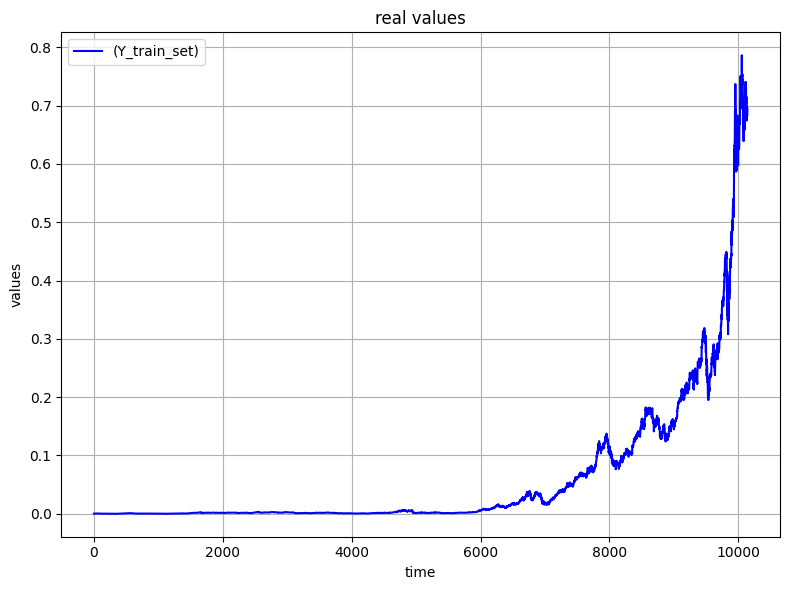

In [21]:

plt.figure(figsize=(8, 6))

plt.plot(Y_train_set, label='(Y_train_set)', color='blue', linestyle='-')
plt.title('real values')
plt.xlabel('time')
plt.ylabel('values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

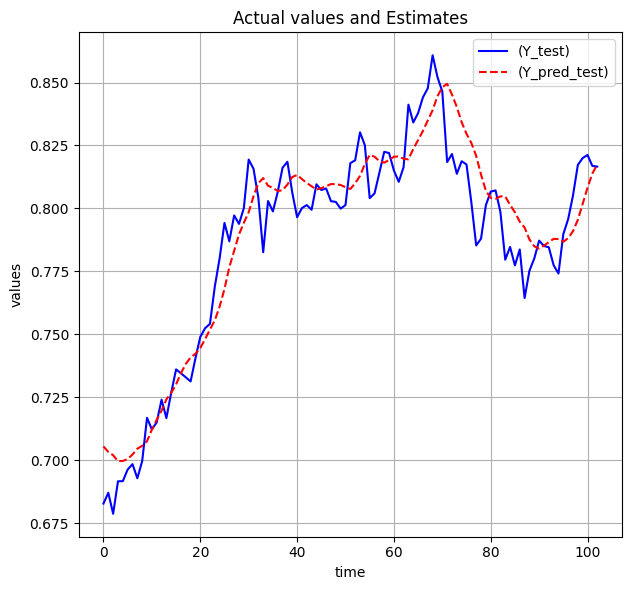

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(Y_test_set, label='(Y_test)', color='blue', linestyle='-')
plt.plot(y_pred_test, label='(Y_pred_test)', color='red', linestyle='--')
plt.title('Actual values ​​and Estimates')
plt.xlabel('time')
plt.ylabel('values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()